In [8]:
# Call the relevant python packages
import numpy as np
import pandas as pd
import glob, os                          # Operating system module and pathnames

import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord


# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Output plots in Notebook
#%matplotlib notebook
%matplotlib inline  

# Table setup

In [9]:
# Read in the catalogue

file = 'NGC6822_Spitzer_JHK.csv'
data = ascii.read(file, data_start=1)

#adds criteria columns to table
#inidivual criteria
data['c1a']=0
data['c1b']=0
data['c1c']=0
data['c2a']=0
data['c2b']=0
data['c2c']=0
data['c3a']=0
data['c3b']=0
data['c3c']=0
data['c4a']=0
data['c4b']=0
data['c5a']=0
data['c5b']=0
data['c5c']=0 #even though no 5c criteria currently
data['c6a']=0
data['c6b']=0
data['c6c']=0
data['c7']=0
data['c8']=0
data['c9a']=0
data['c9b']=0
data['c9c']=0

#any of the inidividual - e.g. c1a=1, c1b=0, c1c=0 ==> c1=1
data['c1']=0
data['c2']=0
data['c3']=0
data['c4']=0
data['c5']=0
data['c6']=0
data['c9']=0
data['c10']=0

#number of Spitzer data (0-5)
data['24 data?']=0
data['36 data?']=0
data['45 data?']=0
data['58 data?']=0
data['80 data?']=0
data['SpNum']=0

#number of HJK data (0-3)
data['H data?']=0
data['J data?']=0
data['K data?']=0
data['HJKNum']=0



#print column names
data.colnames






#define colour and magntitude criteria
err=0.2 #maximum allowed errors for sources to be considered
mod=4.29 #difference in distance moduli between SMC and NGC 6822

def write_column(crit,name):
    print("Number of stars in cut "+name+": {}".format(len(crit[0])))
    for i in range(len(crit[0])):
        #writes '1' to cell where condition is met
        #'0' is the default
        data[name][crit[0][i]]=1
        

        
#CCD/CMD cuts - creates an indexed catalogue of sources meeting the criteria
#sources are only added if their errors are in between 0 and the value <err> defined above
c1a_idx=np.where((data['Hmag']-data['Kmag']<1.1674*(data['Kmag']-data['k45mag'])-0.5240) & (data['eHmag']<err) & (data['eKmag']<err) & (data['e45mag']<err)&(data['eHmag']>0) & (data['eKmag']>0) & (data['e45mag']>0))
write_column(c1a_idx,'c1a')

c1b_idx=np.where((data['Jmag']-data['Kmag']<1*(data['Jmag']-data['k45mag'])-0.4196) & (data['eJmag']<err) & (data['eKmag']<err) & (data['e45mag']<err)&(data['eJmag']>0) & (data['eKmag']>0) & (data['e45mag']>0))
write_column(c1b_idx,'c1b')

c1c_idx=np.where((data['Jmag']-data['Hmag']<1.0758*(data['Hmag']-data['k45mag'])-0.2997) & (data['eJmag']<err) & (data['eHmag']<err) & (data['e45mag']<err)&(data['eJmag']>0) & (data['eHmag']>0) & (data['e45mag']>0))
write_column(c1c_idx,'c1c')

c2a_idx=np.where((data['k36mag']<11+mod) & (data['k36mag']-data['k58mag']>=2.1) & (data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']>0) & (data['e58mag']>0))
write_column(c2a_idx,'c2a')

c2b_idx=np.where((11+mod<data['k36mag'])&(data['k36mag']<16.5) & (0.8<=data['k36mag']-data['k58mag']) & (data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']>0) & (data['e58mag']>0))
write_column(c2b_idx,'c2b')

c2c_idx=np.where((data['k36mag']>=16.5) & (data['k36mag']-data['k58mag']<4.8) & (data['k36mag']-data['k58mag']>0.8) & (data['k36mag']<1.375*(data['k36mag']-data['k58mag'])+15.4) & (data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']>0) & (data['e58mag']>0))
write_column(c2c_idx,'c2c')

c3a_idx=np.where((data['k45mag']<=15) & (data['k45mag']>-2.59*(data['k45mag']-data['k58mag'])+16.3) & (data['e45mag']<err) & (data['e58mag']<err)&(data['e45mag']>0) & (data['e58mag']>0))
write_column(c3a_idx,'c3a')

c3b_idx=np.where((data['k45mag']<16.2)&(data['k45mag']>15) & (data['k45mag']-data['k58mag']>=0.5) & (data['e45mag']<err) & (data['e58mag']<err)&(data['e45mag']>0) & (data['e58mag']>0))
write_column(c3b_idx,'c3b')

c3c_idx=np.where((data['k45mag']>=16.2) & (data['k45mag']<15.5+1.36*(data['k45mag']-data['k58mag'])) & (data['e45mag']<err) & (data['e58mag']<err)&(data['e45mag']>0) & (data['e58mag']>0))
write_column(c3c_idx,'c3c')

c4a_idx=np.where((data['k80mag']<10.7+mod) & (data['k45mag']-data['k80mag']>2.0) & (data['e45mag']<err) & (data['e80mag']<err)&(data['e45mag']>0) & (data['e80mag']>0))
write_column(c4a_idx,'c4a')

c4b_idx=np.where((1.0<data['k45mag']-data['k80mag']) & (data['k45mag']-data['k80mag']<=2.0) & (data['k80mag']<12.7-(data['k45mag']-data['k80mag'])+mod) & (data['k80mag']>11.3-1.8*(data['k45mag']-data['k80mag'])+mod) & (data['e45mag']<err) & (data['e80mag']<err)&(data['e45mag']>0) & (data['e80mag']>0))
write_column(c4b_idx,'c4b')

c5a_idx=np.where((data['k45mag']<15) & (data['k45mag']-data['k24mag']>=4.0) & (data['e45mag']<err) & (data['e24mag']<err)&(data['e45mag']>0) & (data['e24mag']>0))
write_column(c5a_idx,'c5a')

c5b_idx=np.where((data['k45mag']>=15) & (data['k45mag']<11+(data['k45mag']-data['k24mag'])) & (data['e45mag']<err) & (data['e24mag']<err)&(data['e45mag']>0) & (data['e24mag']>0))
write_column(c5b_idx,'c5b')


c6a_idx=np.where((data['k80mag']<10+mod) & (data['k80mag']-data['k24mag']>=2.7) & (data['e80mag']<err) & (data['e24mag']<err)&(data['e80mag']>0) & (data['e24mag']>0))
write_column(c6a_idx,'c6a')

c6b_idx=np.where((data['k80mag']<10+mod) & (data['k80mag']-data['k24mag']<=2.7) & (data['k80mag']>12.5-1.67*(data['k80mag']-data['k24mag'])+mod) & (data['e80mag']<err) & (data['e24mag']<err)&(data['e80mag']>0) & (data['e24mag']>0))
write_column(c6b_idx,'c6b')

c6c_idx=np.where((data['k80mag']>=10+mod) & (data['k80mag']<5.27+1.09*(data['k80mag']-data['k24mag'])+mod) & (data['e80mag']<err) & (data['e24mag']<err)&(data['e80mag']>0) & (data['e24mag']>0))
write_column(c6c_idx,'c6c')

#note | symbol is equivalent to <or>
c7_idx=np.where((data['k36mag']-data['k45mag']>=0.2) & ((data['k36mag']<=13.3)|(data['k36mag']<=8.7+4*(data['k36mag']-data['k45mag'])+mod)) & (data['e36mag']<err) & (data['e45mag']<err)&(data['e36mag']>0) & (data['e45mag']>0))
write_column(c7_idx,'c7')

c8_idx=np.where((data['Hmag']-data['Kmag']>0.0) & (data['Hmag']-data['Kmag']>0.9-1.7*(data['k36mag']-data['k45mag'])) & (data['Hmag']-data['Kmag']<-0.85+3.44*(data['k36mag']-data['k45mag'])) & (data['e36mag']<err) & (data['e45mag']<err) & (data['eHmag']<err) & (data['eKmag']<err)&(data['e36mag']>0) & (data['e45mag']>0) & (data['eHmag']>0) & (data['eKmag']>0))
write_column(c8_idx,'c8')


#NB c9 has been taken from cuts on NGC 6822 so no need for <mod>
c9a_idx=np.where((data['k36mag']-data['k80mag']>=2.5) & (data['k80mag']<12.5) & (data['e36mag']<err) & (data['e80mag']<err) &(data['e36mag']>0) & (data['e80mag']>0))
write_column(c9a_idx,'c9a')

c9b_idx=np.where((data['k80mag']>=12.5) & (data['k80mag']<=14.7) & (data['k80mag']>-2.2*(data['k36mag']-data['k80mag'])+18) & (data['e80mag']<err) & (data['e36mag']<err)&(data['e80mag']>0) & (data['e36mag']>0))
write_column(c9b_idx,'c9b')

c9c_idx=np.where((data['k80mag']<0.2*(data['k36mag']-data['k80mag'])+14.4) & (data['k80mag']>14.7) & (data['k80mag']<=16) & (data['e36mag']<err) & (data['e80mag']<err) &(data['e36mag']>0) & (data['e80mag']>0))
write_column(c9c_idx,'c9c')

#this one has random criteria for now
c10_idx=np.where((data['Kmag']-data['k36mag']<1.1674*(data['k36mag']-data['k45mag'])-0.5240) & (data['eKmag']<err) & (data['e36mag']<err) & (data['e45mag']<err)&(data['eKmag']>0) & (data['e36mag']>0) & (data['e45mag']>0))
write_column(c10_idx,'c10')


#add columns of the inidvidual cut conditions together
#entries in this column are the number of these conditions met
data['c1']=data['c1a']+data['c1b']+data['c1c']
data['c2']=data['c2a']+data['c2b']+data['c2c']
data['c3']=data['c3a']+data['c3b']+data['c3c']
data['c4']=data['c4a']+data['c4b']
data['c5']=data['c5a']+data['c5b']+data['c5c']
data['c6']=data['c6a']+data['c6b']+data['c6c']
data['c9']=data['c9a']+data['c9b']+data['c9c']

#create indices for any sources that meet the numbered conditions
c1_idx=np.where(data['c1']>0)
c2_idx=np.where(data['c2']>0)
c3_idx=np.where(data['c3']>0)
c4_idx=np.where(data['c4']>0)
c5_idx=np.where(data['c5']>0)
c6_idx=np.where(data['c6']>0)
c9_idx=np.where(data['c9']>0)

#print number of sensible (low error) sources in cuts
print("Number of stars in cut c1: {}".format(len(c1_idx[0])))
print("Number of stars in cut c2: {}".format(len(c2_idx[0])))
print("Number of stars in cut c3: {}".format(len(c3_idx[0])))
print("Number of stars in cut c4: {}".format(len(c4_idx[0])))
print("Number of stars in cut c5: {}".format(len(c5_idx[0])))
print("Number of stars in cut c6: {}".format(len(c6_idx[0])))
print("Number of stars in cut c9: {}".format(len(c9_idx[0])))

Number of stars in cut c1a: 1693
Number of stars in cut c1b: 2910
Number of stars in cut c1c: 1416
Number of stars in cut c2a: 10
Number of stars in cut c2b: 105
Number of stars in cut c2c: 694
Number of stars in cut c3a: 31
Number of stars in cut c3b: 180
Number of stars in cut c3c: 675
Number of stars in cut c4a: 538
Number of stars in cut c4b: 799
Number of stars in cut c5a: 72
Number of stars in cut c5b: 1291
Number of stars in cut c6a: 345
Number of stars in cut c6b: 45
Number of stars in cut c6c: 264
Number of stars in cut c7: 212
Number of stars in cut c8: 191
Number of stars in cut c9a: 59
Number of stars in cut c9b: 465
Number of stars in cut c9c: 119
Number of stars in cut c10: 208
Number of stars in cut c1: 3732
Number of stars in cut c2: 809
Number of stars in cut c3: 886
Number of stars in cut c4: 1337
Number of stars in cut c5: 1363
Number of stars in cut c6: 654
Number of stars in cut c9: 643


In [10]:
#print column names
data.colnames

['ID',
 'RA',
 'Dec',
 'k36mag',
 'e36mag',
 'd36mag',
 'k45mag',
 'e45mag',
 'd45mag',
 'k58mag',
 'e58mag',
 'd58mag',
 'k80mag',
 'e80mag',
 'd80mag',
 'k24mag',
 'e24mag',
 'dstArcSec',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'eJmag',
 'Hmag',
 'eHmag',
 'Kmag',
 'eKmag',
 'c1a',
 'c1b',
 'c1c',
 'c2a',
 'c2b',
 'c2c',
 'c3a',
 'c3b',
 'c3c',
 'c4a',
 'c4b',
 'c5a',
 'c5b',
 'c5c',
 'c6a',
 'c6b',
 'c6c',
 'c7',
 'c8',
 'c9a',
 'c9b',
 'c9c',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c6',
 'c9',
 'c10',
 '24 data?',
 '36 data?',
 '45 data?',
 '58 data?',
 '80 data?',
 'SpNum',
 'H data?',
 'J data?',
 'K data?',
 'HJKNum']

Note null values in the IRAC and MIPS data are given as -9999.0

Nulll values in the JHK section were given as null initially.

These have been made consistent with each other to make life easier later on.


In [5]:
# If you want to examine the catalogue in browser
data.show_in_browser(jsviewer=True)

In [11]:
# Select sources that have MIPS [24] data & Also mask out sources with large errors ie >0.2
#First index is array of booleans
#Second index is array of indices in the catalogue
MIPS24_idx = ((data['k24mag'] > 0.0) & (data['e24mag'] < err) & (data['e24mag'] > 0.0)) 
MIPS24_cat = data[MIPS24_idx]
idx_24=np.where(MIPS24_idx)
#print("Number of stars with [24] data: {}".format(len(idx_24[0])))
write_column(idx_24,'24 data?')

CMD36_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)) 
CMD36_cat = data[CMD36_idx]
idx_36=np.where(CMD36_idx)
#print("Number of stars with [3.6] data: {}".format(len(idx_36[0])))
write_column(idx_36,'36 data?')

CMD45_idx = ((data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CMD45_cat = data[CMD45_idx]
idx_45=np.where(CMD45_idx)
#print("Number of stars with [4.5] data: {}".format(len(idx_45[0])))
write_column(idx_45,'45 data?')

CMD58_idx = ((data['k58mag'] > 0.0) & (data['e58mag'] < err) & (data['e58mag'] > 0.0)) 
CMD58_cat = data[CMD58_idx]
idx_58=np.where(CMD58_idx)
#print("Number of stars with [5.8] data: {}".format(len(idx_58[0])))
write_column(idx_58,'58 data?')

CMD80_idx = ((data['k80mag'] > 0.0) & (data['e80mag'] < err) & (data['e80mag'] > 0.0)) 
CMD80_cat = data[CMD80_idx]
idx_80=np.where(CMD80_idx)
#print("Number of stars with [8.0] data: {}".format(len(idx_80[0])))
write_column(idx_80,'80 data?')

CCDH_idx = ((data['Hmag'] > 0.0) & (data['eHmag'] < err) & (data['eHmag'] > 0.0)) 
CCDH_cat = data[CCDH_idx]
idx_H=np.where(CCDH_idx)
#print("Number of stars with H data: {}".format(len(idx_H[0])))
write_column(idx_H,'H data?')

CCDJ_idx = ((data['Jmag'] > 0.0) & (data['eJmag'] < err) & (data['eJmag'] > 0.0)) 
CCDJ_cat = data[CCDJ_idx]
idx_J=np.where(CCDJ_idx)
#print("Number of stars with J data: {}".format(len(idx_J[0])))
write_column(idx_J,'J data?')

CCDK_idx = ((data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)) 
CCDK_cat = data[CCDK_idx]
idx_K=np.where(CCDK_idx)
#print("Number of stars with K data: {}".format(len(idx_K[0])))
write_column(idx_K,'K data?')


#add columns of the inidvidual filter conditions together
#entries in this column are the number of these conditions met
data['SpNum']=data['24 data?']+data['36 data?']+data['45 data?']+data['58 data?']+data['80 data?']
data['HJKNum']=data['H data?']+data['J data?']+data['K data?']


#add columns of the number of Spitzer data together
idx_Sp0of5=np.where(data['SpNum']==0)
print("Number of stars with no Spitzer data: {}".format(len(idx_Sp0of5[0])))
idx_Sp1of5=np.where(data['SpNum']==1)
print("Number of stars with 1 of 5 Spitzer data: {}".format(len(idx_Sp1of5[0])))
idx_Sp2of5=np.where(data['SpNum']==2)
print("Number of stars with 2 of 5 Spitzer data: {}".format(len(idx_Sp2of5[0])))
idx_Sp3of5=np.where(data['SpNum']==3)
print("Number of stars with 3 of 5 Spitzer data: {}".format(len(idx_Sp3of5[0])))
idx_Sp4of5=np.where(data['SpNum']==4)
print("Number of stars with 4 of 5 Spitzer data: {}".format(len(idx_Sp4of5[0])))
idx_Sp5of5=np.where(data['SpNum']==5)
print("Number of stars with 5 of 5 Spitzer data: {}".format(len(idx_Sp5of5[0])))

idx_HJK0of3=np.where(data['HJKNum']==0)
print("Number of stars with no HJK data: {}".format(len(idx_HJK0of3[0])))
idx_HJK1of3=np.where(data['HJKNum']==1)
print("Number of stars with 1 of 3 HJK data: {}".format(len(idx_HJK1of3[0])))
idx_HJK2of3=np.where(data['HJKNum']==2)
print("Number of stars with 2 of 3 HJK data: {}".format(len(idx_HJK2of3[0])))
idx_HJK3of3=np.where(data['HJKNum']==3)
print("Number of stars with 3 of 3 HJK data: {}".format(len(idx_HJK3of3[0])))

Number of stars in cut 24 data?: 4302
Number of stars in cut 36 data?: 29931
Number of stars in cut 45 data?: 27814
Number of stars in cut 58 data?: 17754
Number of stars in cut 80 data?: 13662
Number of stars in cut H data?: 14232
Number of stars in cut J data?: 13530
Number of stars in cut K data?: 13865
Number of stars with no Spitzer data: 295
Number of stars with 1 of 5 Spitzer data: 1514
Number of stars with 2 of 5 Spitzer data: 7937
Number of stars with 3 of 5 Spitzer data: 10081
Number of stars with 4 of 5 Spitzer data: 8758
Number of stars with 5 of 5 Spitzer data: 2160
Number of stars with no HJK data: 16259
Number of stars with 1 of 3 HJK data: 231
Number of stars with 2 of 3 HJK data: 1369
Number of stars with 3 of 3 HJK data: 12886


In [12]:
#Create indices to be used for CMDs. These will contain sources which are not
#upper limits in either of the two relevant filters

CMD3658_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k58mag'] > 0.0) & (data['e58mag'] < err) & (data['e58mag'] > 0.0)) 
CMD3658_cat = data[CMD3658_idx]
idx_3658=np.where(CMD3658_idx)
print("Number of stars with good 36/58 data: {}".format(len(idx_3658[0])))

CMD4558_idx = ((data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)&(data['k58mag'] > 0.0) & (data['e58mag'] < err) & (data['e58mag'] > 0.0)) 
CMD4558_cat = data[CMD4558_idx]
idx_4558=np.where(CMD4558_idx)
print("Number of stars with good 45/58 data: {}".format(len(idx_4558[0])))

CMD4580_idx = ((data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)&(data['k80mag'] > 0.0) & (data['e80mag'] < err) & (data['e80mag'] > 0.0)) 
CMD4580_cat = data[CMD4580_idx]
idx_4580=np.where(CMD4580_idx)
print("Number of stars with good 45/80 data: {}".format(len(idx_4580[0])))

CMD4524_idx = ((data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)&(data['k24mag'] > 0.0) & (data['e24mag'] < err) & (data['e24mag'] > 0.0)) 
CMD4524_cat = data[CMD4524_idx]
idx_4524=np.where(CMD4524_idx)
print("Number of stars with good 45/24 data: {}".format(len(idx_4524[0])))

CMD8024_idx = ((data['k80mag'] > 0.0) & (data['e80mag'] < err) & (data['e80mag'] > 0.0)&(data['k24mag'] > 0.0) & (data['e24mag'] < err) & (data['e24mag'] > 0.0)) 
CMD8024_cat = data[CMD8024_idx]
idx_8024=np.where(CMD8024_idx)
print("Number of stars with good 80/24 data: {}".format(len(idx_8024[0])))

CMD3645_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CMD3645_cat = data[CMD3645_idx]
idx_3645=np.where(CMD3645_idx)
print("Number of stars with good 36/45 data: {}".format(len(idx_3645[0])))

CMD3680_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k80mag'] > 0.0) & (data['e80mag'] < err) & (data['e80mag'] > 0.0)) 
CMD3680_cat = data[CMD3680_idx]
idx_3680=np.where(CMD3680_idx)
print("Number of stars with good 36/80 data: {}".format(len(idx_3680[0])))

CCDHKK45_idx = ((data['Hmag'] > 0.0) & (data['eHmag'] < err) & (data['eHmag'] > 0.0)&(data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCDHKK45_cat = data[CCDHKK45_idx]
idx_HKK45=np.where(CCDHKK45_idx)
print("Number of stars with good H/K/45 data: {}".format(len(idx_HKK45[0])))

CCDJKJ45_idx = ((data['Jmag'] > 0.0) & (data['eJmag'] < err) & (data['eJmag'] > 0.0)&(data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCDJKJ45_cat = data[CCDJKJ45_idx]
idx_JKJ45=np.where(CCDJKJ45_idx)
print("Number of stars with good J/K/45 data: {}".format(len(idx_JKJ45[0])))

CCDJHH45_idx = ((data['Jmag'] > 0.0) & (data['eJmag'] < err) & (data['eJmag'] > 0.0)&(data['Hmag'] > 0.0) & (data['eHmag'] < err) & (data['eHmag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCDJHH45_cat = data[CCDJHH45_idx]
idx_JHH45=np.where(CCDJHH45_idx)
print("Number of stars with good J/H/45 data: {}".format(len(idx_JHH45[0])))

CCDK363645_idx = ((data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)&(data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCDK363645_cat = data[CCDK363645_idx]
idx_K363645=np.where(CCDK363645_idx)
print("Number of stars with good K/36/45 data: {}".format(len(idx_K363645[0])))

CCD36454558_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k58mag'] > 0.0) & (data['e58mag'] < err) & (data['e58mag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCD36454558_cat = data[CCD36454558_idx]
idx_36454558=np.where(CCD36454558_idx)
print("Number of stars with good 36/45/58 data: {}".format(len(idx_36454558[0])))

CCDHK3645_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)&(data['Hmag'] > 0.0) & (data['eHmag'] < err) & (data['eHmag'] > 0.0)&(data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)) 
CCDHK3645_cat = data[CCDHK3645_idx]
idx_HK3645=np.where(CCDHK3645_idx)
print("Number of stars with good H/K/36/45 data: {}".format(len(idx_HK3645[0])))

Number of stars with good 36/58 data: 17504
Number of stars with good 45/58 data: 16919
Number of stars with good 45/80 data: 12986
Number of stars with good 45/24 data: 4052
Number of stars with good 80/24 data: 2710
Number of stars with good 36/45 data: 27510
Number of stars with good 36/80 data: 13464
Number of stars with good H/K/45 data: 13484
Number of stars with good J/K/45 data: 12898
Number of stars with good J/H/45 data: 13171
Number of stars with good K/36/45 data: 13654
Number of stars with good 36/45/58 data: 16795
Number of stars with good H/K/36/45 data: 13459


In [13]:
# Create catalogues of reliable sources
#reliable Spitzer is 3,4 or 5 out of 5
#reliable HJK is 2,3 out of 3

reliable_sp_idx=((data['SpNum']>=3))
reliable_sp_cat=data[reliable_sp_idx]
rel_sp_total=len(np.where(reliable_sp_idx)[0])
print("There are "+str(rel_sp_total)+" reliable stars for Spitzer ("+str(100*rel_sp_total/30745)+"%)")

reliable_HJK_idx=((data['HJKNum']>=2) & (data['45 data?']==1) & (data['36 data?']==1))
reliable_HJK_cat=data[reliable_HJK_idx]
rel_HJK_total=len(np.where(reliable_HJK_idx)[0])
print("There are "+str(rel_HJK_total)+" reliable stars for JHK ("+str(100*rel_HJK_total/30745)+"%)")

reliable_idx=((data['SpNum']>=3)|((data['HJKNum']>=2) & (data['45 data?']==1) & (data['36 data?']==1)))
reliable_cat=data[reliable_idx]
reliable_total=len(np.where(reliable_idx)[0])
print("There are "+str(reliable_total)+" total reliable stars from either of these catalogues")

#uncomment below to view the reliable Spitzer and HJK catalogues
#reliable_sp_cat.show_in_browser(jsviewer=True)
#reliable_HJK_cat.show_in_browser(jsviewer=True)

There are 20999 reliable stars for Spitzer (68.30053667262969%)
There are 14006 reliable stars for JHK (45.555374857700436%)
There are 23908 total reliable stars from either of these catalogues


reliable Spitzer ~68%
reliable HJK ~46%

In [15]:
#create indices for sources meeting the cuts in the JOINT reliable catalogue
c1a_rel_idx=np.where(reliable_cat['c1a']>0)
c1b_rel_idx=np.where(reliable_cat['c1b']>0)
c1c_rel_idx=np.where(reliable_cat['c1c']>0)
c1_rel_idx=np.where(reliable_cat['c1']>0)
c2_rel_idx=np.where(reliable_cat['c2']>0)
c3_rel_idx=np.where(reliable_cat['c3']>0)
c4_rel_idx=np.where(reliable_cat['c4']>0)
c5_rel_idx=np.where(reliable_cat['c5']>0)
c6_rel_idx=np.where(reliable_cat['c6']>0)
c7_rel_idx=np.where(reliable_cat['c7']>0)
c8_rel_idx=np.where(reliable_cat['c8']>0)
c9_rel_idx=np.where(reliable_cat['c9']>0)
c10_rel_idx=np.where(reliable_cat['c10']>0)
print("Number of RELIABLE stars in cut c1a: {}".format(len(c1a_rel_idx[0])))
print("Number of RELIABLE stars in cut c1b: {}".format(len(c1b_rel_idx[0])))
print("Number of RELIABLE stars in cut c1c: {}".format(len(c1c_rel_idx[0])))
print("Number of RELIABLE stars in cut c1: {}".format(len(c1_rel_idx[0])))
print("Number of RELIABLE stars in cut c2: {}".format(len(c2_rel_idx[0])))
print("Number of RELIABLE stars in cut c3: {}".format(len(c3_rel_idx[0])))
print("Number of RELIABLE stars in cut c4: {}".format(len(c4_rel_idx[0])))
print("Number of RELIABLE stars in cut c5: {}".format(len(c5_rel_idx[0])))
print("Number of RELIABLE stars in cut c6: {}".format(len(c6_rel_idx[0])))
print("Number of RELIABLE stars in cut c7: {}".format(len(c7_rel_idx[0])))
print("Number of RELIABLE stars in cut c8: {}".format(len(c8_rel_idx[0])))
print("Number of RELIABLE stars in cut c9: {}".format(len(c9_rel_idx[0])))
print("Number of RELIABLE stars in cut c10: {}".format(len(c10_rel_idx[0])))

Number of RELIABLE stars in cut c1a: 1691
Number of RELIABLE stars in cut c1b: 2907
Number of RELIABLE stars in cut c1c: 1416
Number of RELIABLE stars in cut c1: 3729
Number of RELIABLE stars in cut c2: 787
Number of RELIABLE stars in cut c3: 875
Number of RELIABLE stars in cut c4: 1336
Number of RELIABLE stars in cut c5: 1362
Number of RELIABLE stars in cut c6: 654
Number of RELIABLE stars in cut c7: 212
Number of RELIABLE stars in cut c8: 191
Number of RELIABLE stars in cut c9: 639
Number of RELIABLE stars in cut c10: 208


# CMDs

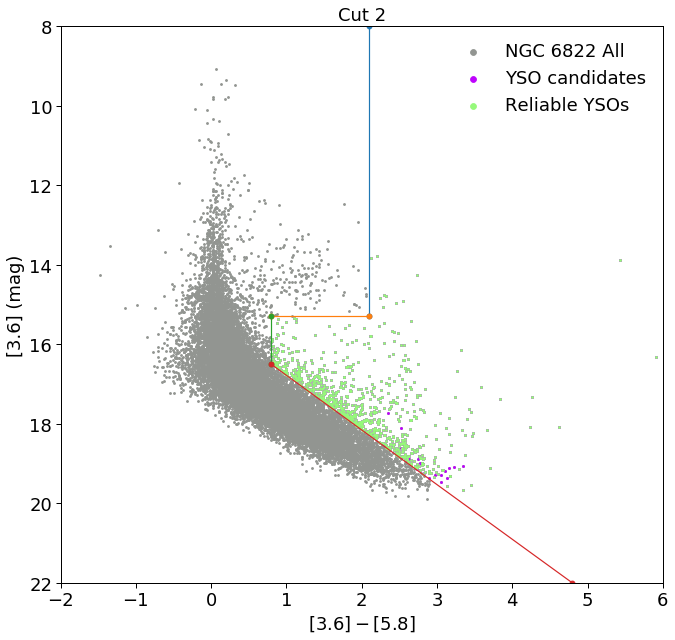

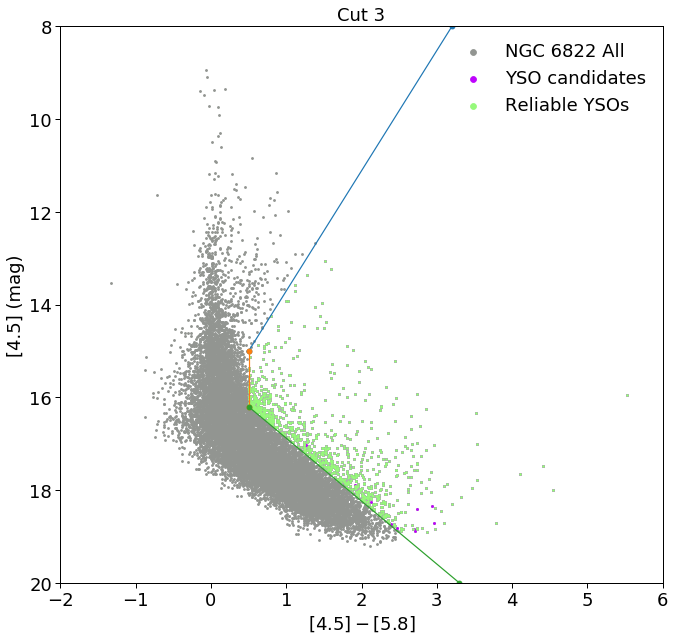

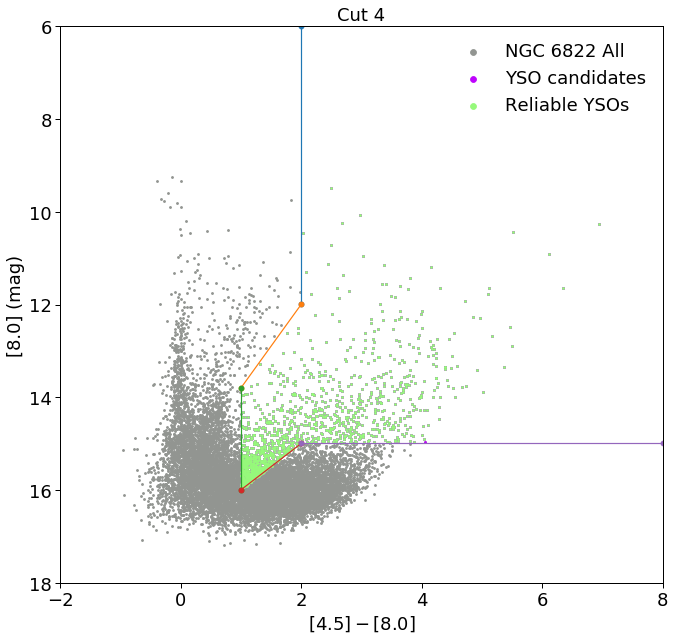

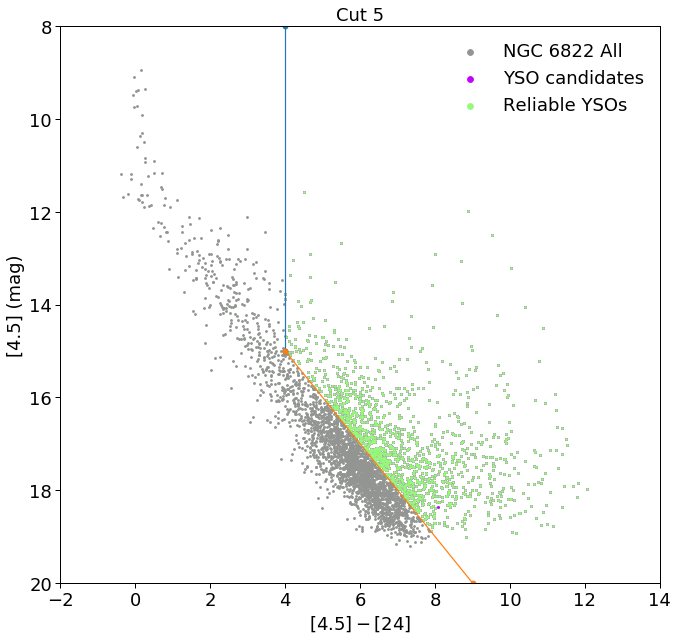

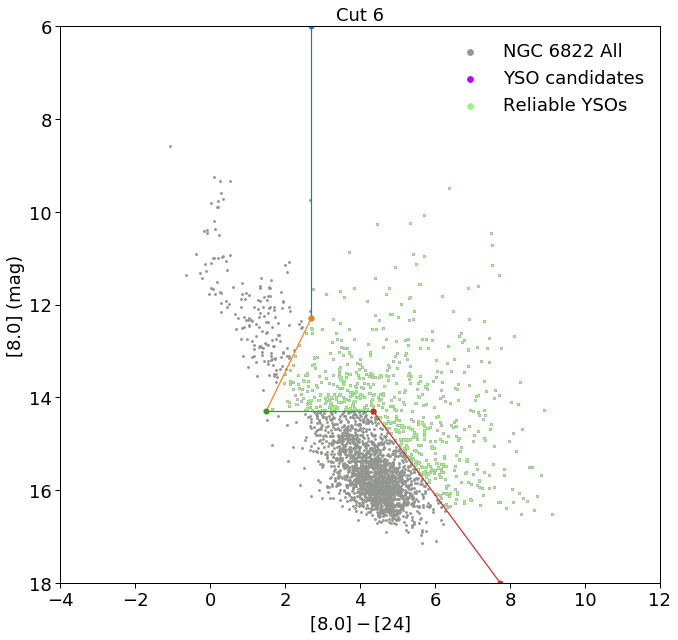

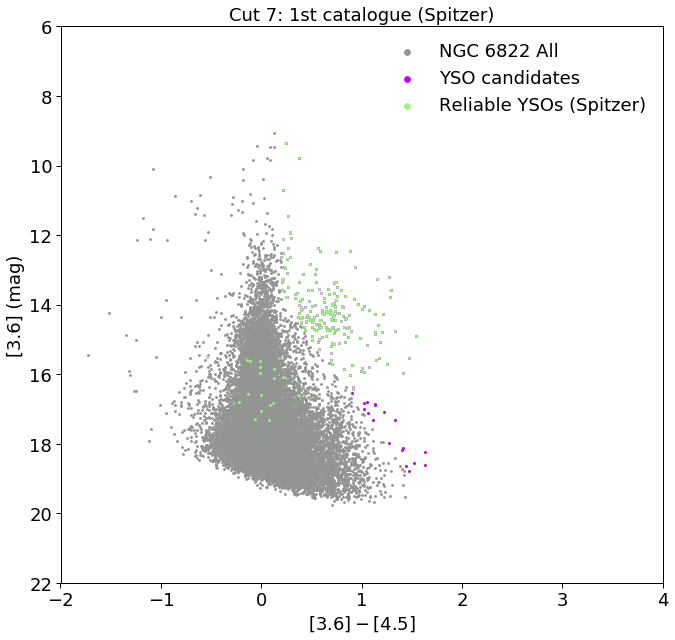

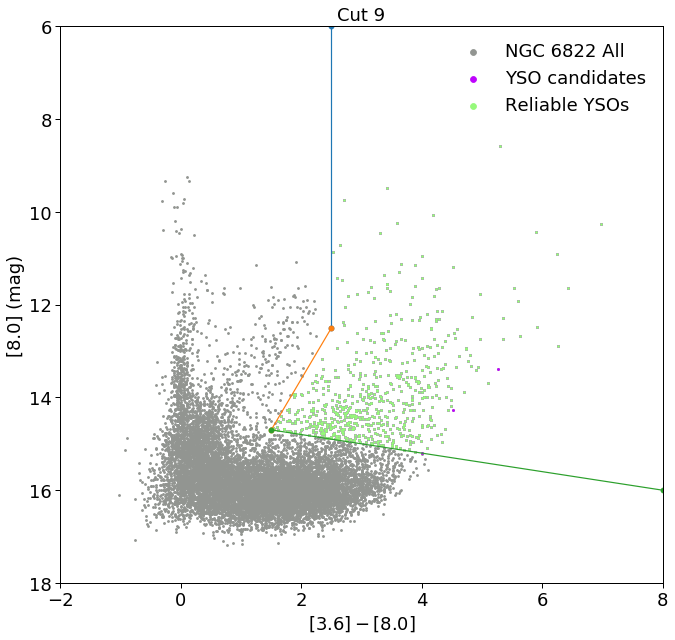

In [20]:
#note the purple overplotted stars on these diagrams do not pertain to the joint catalogue but
#this doesn't really matter at this stage

def CMD(A,B,C,bgd_idx,cut_idx,sp_idx,num,xlabel,ylabel,xlim,ylim):
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=18)
    plt.rc("ytick", labelsize=18)
    plt.rc("axes", labelsize=18)
    plt.rc("legend", fontsize=18)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.scatter(data[B][bgd_idx]-data[C][bgd_idx], data[A][bgd_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][cut_idx]-data[C][cut_idx], data[A][cut_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_sp_cat[B][sp_idx]-reliable_sp_cat[C][sp_idx], reliable_sp_cat[A][sp_idx], s=3.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 1st catalogue (Spitzer)', fontsize=18)
    
    '''
    #Make 2nd diagram for 2nd reliable catalogue
    plt.subplot(1,2,2)
    # Make the actual plot
    plt.scatter(reliable_cat[B]-reliable_cat[C], reliable_cat[A], s=3.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][cut_idx]-data[C][cut_idx], data[A][cut_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_HJK_cat[B][HJK_idx]-reliable_HJK_cat[C][HJK_idx], reliable_HJK_cat[A][HJK_idx], s=3.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (JHK)")
    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 2nd catalogue (JHK)', fontsize=18)
    '''
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
    
def CMD_lines(A,B,C,bgd_idx,cut_idx,sp_idx,num,xlabel,ylabel,xlim,ylim,lines):
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=18)
    plt.rc("ytick", labelsize=18)
    plt.rc("axes", labelsize=18)
    plt.rc("legend", fontsize=18)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.scatter(data[B][bgd_idx]-data[C][bgd_idx], data[A][bgd_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][cut_idx]-data[C][cut_idx], data[A][cut_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_cat[B][sp_idx]-reliable_cat[C][sp_idx], reliable_cat[A][sp_idx], s=3.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")

    lim=int(0.5*len(lines))
    for i in range(lim):
        x,y=lines[2*i],lines[2*i+1]
        plt.plot(x,y,marker='o')
    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num, fontsize=18)
    
    '''
    #Make 2nd diagram for 2nd reliable catalogue
    plt.subplot(1,2,2)
    # Make the actual plot
    plt.scatter(reliable_cat[B]-reliable_cat[C], reliable_cat[A], s=3.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][all_idx]-data[C][all_idx], data[A][all_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_HJK_cat[B][HJK_idx]-reliable_HJK_cat[C][HJK_idx], reliable_HJK_cat[A][HJK_idx], s=3.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (JHK)")
    
    for i in range(lim):
        x,y=lines[2*i],lines[2*i+1]
        plt.plot(x,y,marker='o')
    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 2nd catalogue (JHK)', fontsize=18)
    '''
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
    
    
CMD_lines('k36mag','k36mag','k58mag',idx_3658,c2_idx,c2_rel_idx,'2','$[3.6] -[5.8]$','[3.6] (mag)',(-2,6),(22,8),([2.1,2.1],[8,11+mod],[2.1,0.8],[11+mod,11+mod],[0.8,0.8],[11+mod,16.5],[0.8,4.8],[16.5,22]))
CMD_lines('k45mag','k45mag','k58mag',idx_4558,c3_idx,c3_rel_idx,'3','$[4.5] -[5.8]$','[4.5] (mag)',(-2,6),(20,8),([3.2,0.5],[8,15],[0.5,0.5],[15,16.2],[0.5,3.3],[16.2,20]))
CMD_lines('k80mag','k45mag','k80mag',idx_4580,c4_idx,c4_rel_idx,'4','$[4.5] -[8.0]$','[8.0] (mag)',(-2,8),(18,6),([2,2],[6,7.7+mod],[2,1],[7.7+mod,9.5+mod],[1,1],[9.5+mod,11.7+mod],[1,2],[11.7+mod,10.7+mod],[2,8],[10.7+mod,10.7+mod]))
CMD_lines('k45mag','k45mag','k24mag',idx_4524,c5_idx,c5_rel_idx,'5','$[4.5] -[24]$','[4.5] (mag)',(-2,14),(20,8),([4,4],[8,15],[4,9],[15,20]))
CMD_lines('k80mag','k80mag','k24mag',idx_8024,c6_idx,c6_rel_idx,'6','$[8.0] -[24]$','[8.0] (mag)',(-4,12),(18,6),([2.7,2.7],[6,12.281],[2.7,1.497],[12.281,10+mod],[1.497,4.34],[10+mod,10+mod],[4.34,7.74],[10+mod,18]))
CMD('k36mag','k36mag','k45mag',idx_3645,c7_idx,c7_rel_idx,'7','$[3.6] -[4.5]$','[3.6] (mag)',(-2,4),(22,6))
CMD_lines('k80mag','k36mag','k80mag',idx_3680,c9_idx,c9_rel_idx,'9','$[3.6] -[8.0]$','[8.0] (mag)',(-2,8),(18,6),([2.5,2.5],[6,12.5],[2.5,1.5],[12.5,14.7],[1.5,8],[14.7,16]))


# LOCATION PLOTS

Box width is 4.19999999999709 arcmin
Box height is 3.0 arcmin
Box area is 12.599999999991269 arcmin2



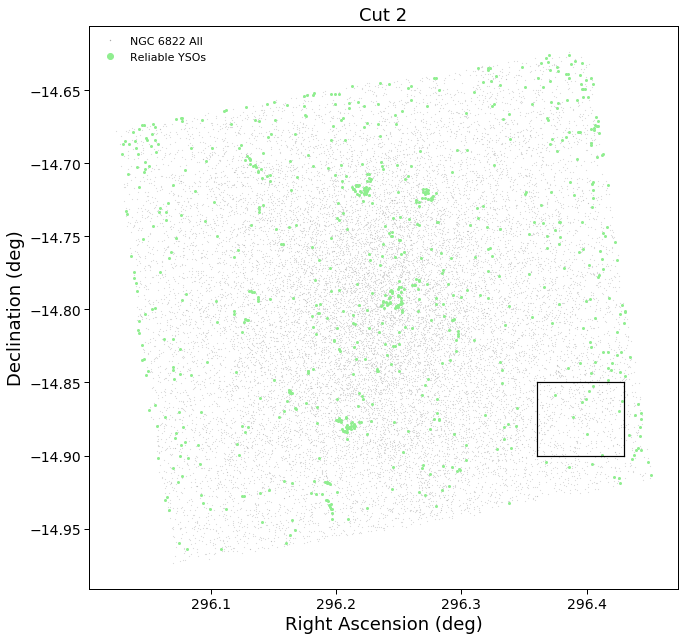

The total number of sources in the box is 377
The number of reliable YSOs in the box is 10
There are 0.79 sources of contamination per square arcmin (2d.p.)
The percentage of contaminated sources to total number of sources in the box is 2.65 %


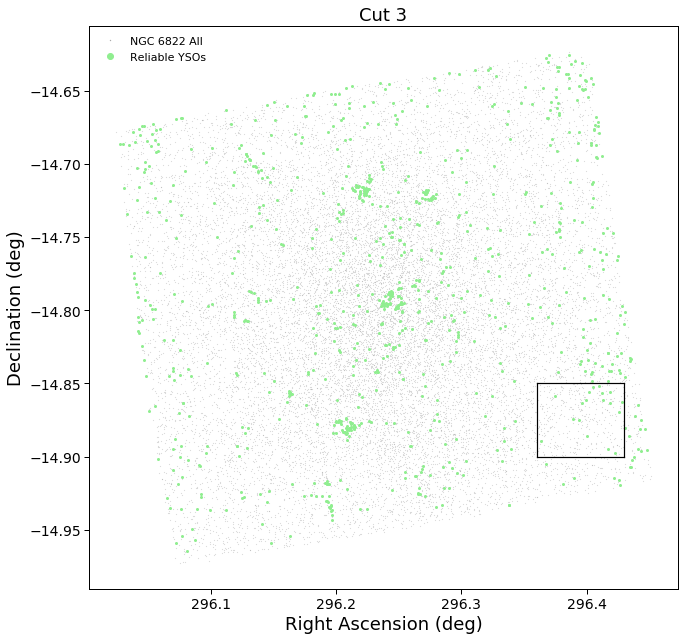

The total number of sources in the box is 358
The number of reliable YSOs in the box is 18
There are 1.43 sources of contamination per square arcmin (2d.p.)
The percentage of contaminated sources to total number of sources in the box is 5.03 %


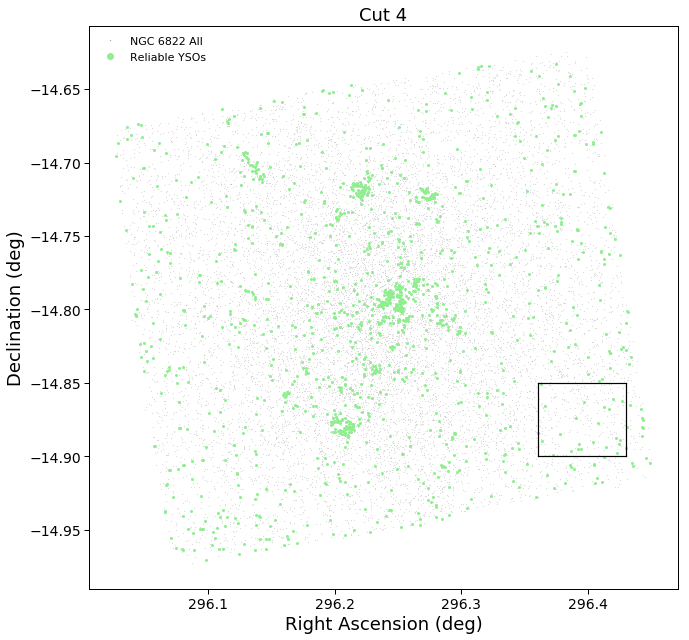

The total number of sources in the box is 234
The number of reliable YSOs in the box is 24
There are 1.9 sources of contamination per square arcmin (2d.p.)
The percentage of contaminated sources to total number of sources in the box is 10.26 %


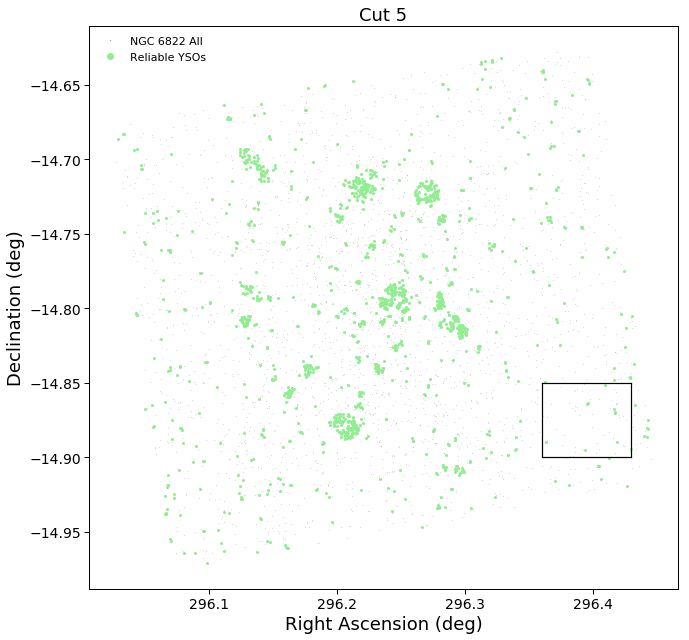

The total number of sources in the box is 65
The number of reliable YSOs in the box is 10
There are 0.79 sources of contamination per square arcmin (2d.p.)
The percentage of contaminated sources to total number of sources in the box is 15.38 %


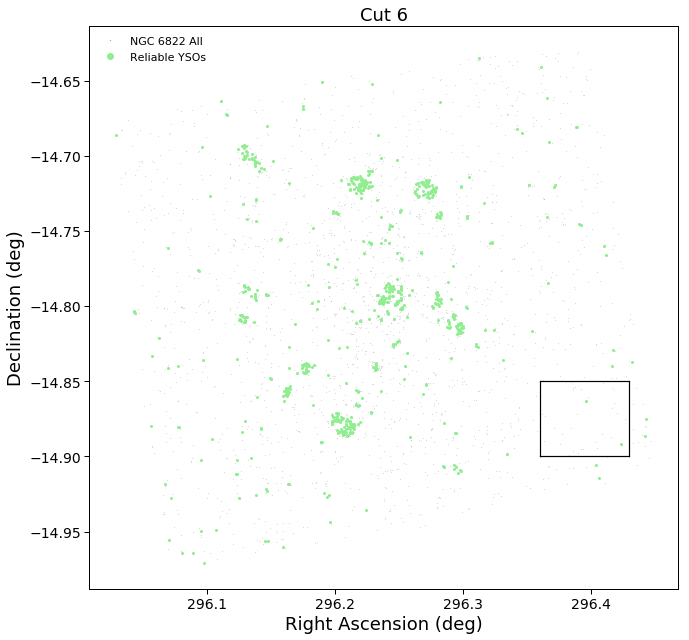

The total number of sources in the box is 35
The number of reliable YSOs in the box is 2
There are 0.16 sources of contamination per square arcmin (2d.p.)
The percentage of contaminated sources to total number of sources in the box is 5.71 %


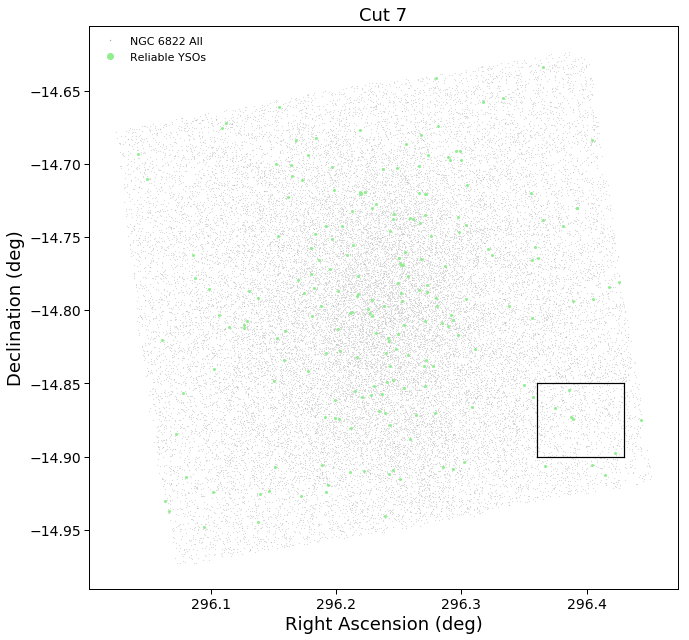

The total number of sources in the box is 551
The number of reliable YSOs in the box is 5
There are 0.4 sources of contamination per square arcmin (2d.p.)
The percentage of contaminated sources to total number of sources in the box is 0.91 %


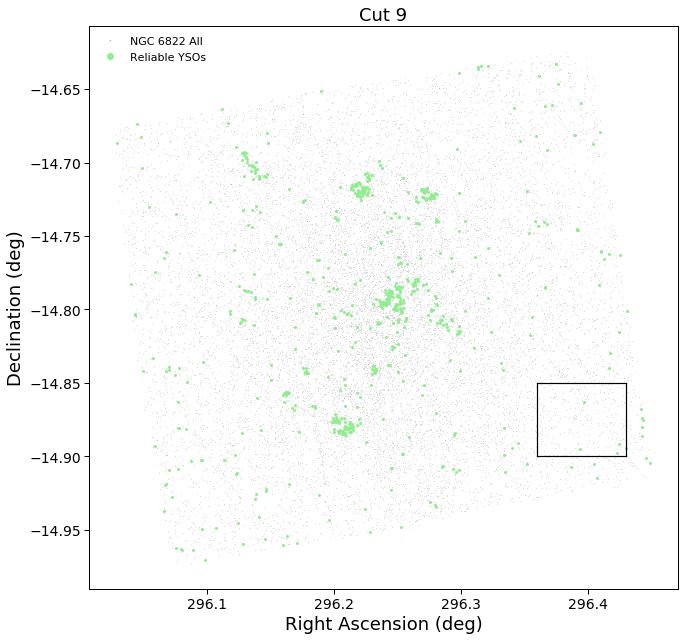

The total number of sources in the box is 250
The number of reliable YSOs in the box is 5
There are 0.4 sources of contamination per square arcmin (2d.p.)
The percentage of contaminated sources to total number of sources in the box is 2.0 %


In [61]:
minRA=296.36*u.degree
maxRA=296.43*u.degree
minDec=-14.9*u.degree
maxDec=-14.85*u.degree

minRA=minRA.to(u.arcmin)
maxRA=maxRA.to(u.arcmin)
minDec=minDec.to(u.arcmin)
maxDec=maxDec.to(u.arcmin)
box_width=(maxRA-minRA)
print('Box width is',box_width)
box_height=maxDec-minDec
print('Box height is',box_height)
box_area=box_width*box_height
print('Box area is',box_area)
print('')

minRA=minRA.to(u.deg)
maxRA=maxRA.to(u.deg)
minDec=minDec.to(u.deg)
maxDec=maxDec.to(u.deg)

def location_plot(bgd_idx,cut_idx,sp_idx,num):
    # Plot the cataloge data on the sky
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=11)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.plot(data['RA'][bgd_idx], data['Dec'][bgd_idx], '.', color='grey', ms=0.2, label="NGC 6822 All")
    
    # Over plot sources with [24] data
    #plt.plot(data['RA'][MIPS24_idx], data['Dec'][MIPS24_idx], '.', color='orange', ms=4, label="[24] source")
    
    #Over plot sensible sources which make the colour cut criteria
    #plt.plot(data['RA'][cut_idx], data['Dec'][cut_idx], '.', color='darkviolet', ms=4, label="YSO candidates")
    
    #overplot all reliable sources that meet the cut
    plt.plot(reliable_cat['RA'][sp_idx], reliable_cat['Dec'][sp_idx], '.', color='lightgreen', ms=4, label="Reliable YSOs")
    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    
    # Add a legend and a title
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num,fontsize=18)
    
    x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]
    x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]
    x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]
    x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]
    plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='black')
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
    
    idx_total_sources_box=np.where((data['RA'][bgd_idx]<(maxRA.value))&(data['RA'][bgd_idx]>(minRA.value))&(data['Dec'][bgd_idx]<(maxDec.value))&(data['Dec'][bgd_idx]>(minDec.value)))
    num_total_sources_box=len(idx_total_sources_box[0])
    print('The total number of sources in the box is',num_total_sources_box)
    box_idx=np.where((reliable_cat['RA'][sp_idx]<(maxRA.value))&(reliable_cat['RA'][sp_idx]>(minRA.value))&(reliable_cat['Dec'][sp_idx]<(maxDec.value))&(reliable_cat['Dec'][sp_idx]>(minDec.value)))
    num_contam=len(box_idx[0])
    print('The number of reliable YSOs in the box is',num_contam)
    print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')
    print('The percentage of contaminated sources to total number of sources in the box is',round(100*num_contam/num_total_sources_box,2),'%')


#location_plot(c1_idx,c1_rel_idx,'1')
location_plot(idx_3658,c2_idx,c2_rel_idx,'2')
location_plot(idx_4558,c3_idx,c3_rel_idx,'3')
location_plot(idx_4580,c4_idx,c4_rel_idx,'4')
location_plot(idx_4524,c5_idx,c5_rel_idx,'5')
location_plot(idx_8024,c6_idx,c6_rel_idx,'6')
location_plot(idx_3645,c7_idx,c7_rel_idx,'7')
#location_plot(c8_idx,c8_rel_idx,'8')
location_plot(idx_3680,c9_idx,c9_rel_idx,'9')
#location_plot(c10_idx,c10_rel_idx,'10')

#Failed Hess function

def Hess(A,B,C,colmin,colmax,colbin,magmin,magmax,magbin,xlims,ylims):
    #Defining the magnitude and color for the entire catalogue
    color = data[B]-data[C] 
    mag2= data[A]
    
    #Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
    coledges = np.linspace(colmin,colmax,colbin) #(min, max, nbins)
    magedges = np.linspace(magmin,magmax,magbin)
    extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]
    
    #2D histogram
    numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
    numH[0][numH[0] == 0] = np.nan
    numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

    #Setting up figure, 6"x5" in this case
    fig = plt.figure(figsize=(18,9))

    plt.clf()      #clears plot area
    ax = plt.gca() #sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)

    #Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
    plt.setp(ax,xlim=xlims,ylim=ylims,xlabel='[3.6]-[5.8]',ylabel='[3.6] (mag)')


    #Show the image (the 2D histogram)
    im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

    im.set_clim(0,1.5)         #clipping values of the image to show.
    im.set_cmap('gist_yarg')   #choosing a color map
    plt.scatter(data[B][c2_idx]-data[C][c2_idx], data[A][c2_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
    plt.title('CutCutCut 2')
    
    
Hess('k36mag','k36mag','k58mag',-2.0,8,50,8,22,50,(-2,6),(22,8))
    


# HESS DIAGRAMS

Text(0.5,1,'Cut 2')

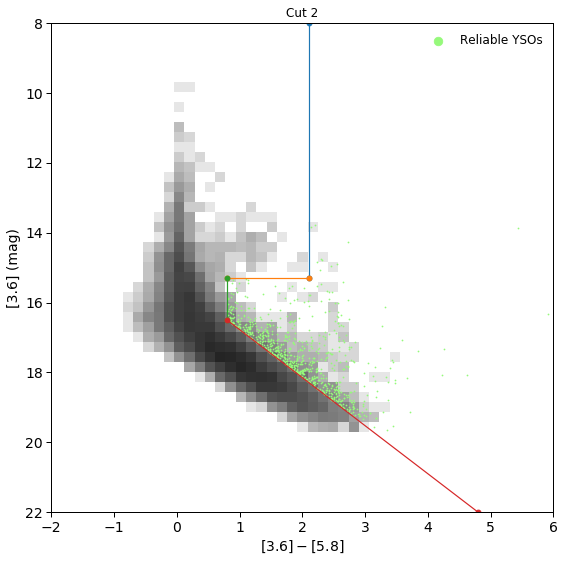

In [22]:
#3658 Spitzer
#Defining the magnitude and color
color = data['k36mag'][idx_3658]-data['k58mag'][idx_3658] 
mag2= data['k36mag'][idx_3658]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 6, 50) #(min, max, nbins)
magedges = np.linspace(8, 22, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(9,9))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,6],
         ylim=[22,8],
         xlabel='$[3.6] - [5.8]$',
         ylabel='[3.6] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c2_idx]-data['k58mag'][c2_idx], data['k36mag'][c2_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_cat['k36mag'][c2_rel_idx]-reliable_cat['k58mag'][c2_rel_idx], reliable_cat['k36mag'][c2_rel_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")

lines=([2.1,2.1],[8,11+mod],[2.1,0.8],[11+mod,11+mod],[0.8,0.8],[11+mod,16.5],[0.8,4.8],[16.5,22])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,marker='o')

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 2',fontsize=12)

Text(0.5,1,'Cut 3')

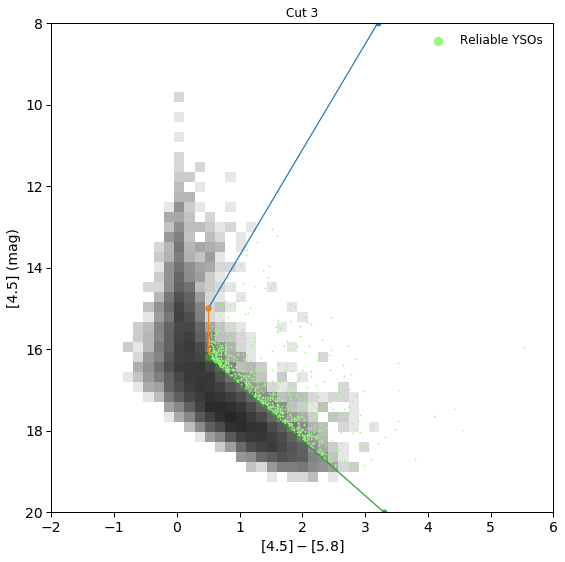

In [23]:
#4558 Spitzer
#Defining the magnitude and color
color = data['k45mag'][idx_4558]-data['k58mag'][idx_4558] 
mag2= data['k45mag'][idx_4558]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 6, 50) #(min, max, nbins)
magedges = np.linspace(8, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(9,9))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,6],
         ylim=[20,8],
         xlabel='$[4.5] - [5.8]$',
         ylabel='[4.5] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k45mag'][c3_idx]-data['k58mag'][c3_idx], data['k45mag'][c3_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_cat['k45mag'][c3_rel_idx]-reliable_cat['k58mag'][c3_rel_idx], reliable_cat['k45mag'][c3_rel_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")

lines=([3.2,0.5],[8,15],[0.5,0.5],[15,16.2],[0.5,3.3],[16.2,20])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,marker='o')
    
# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 3',fontsize=12)

Text(0.5,1,'Cut 4')

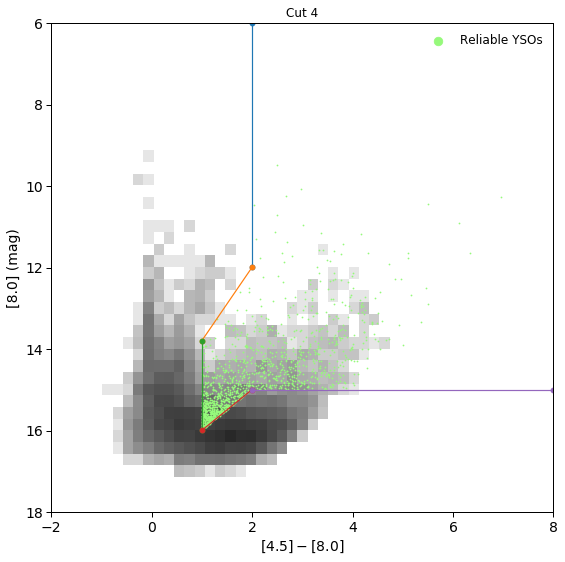

In [24]:
#4580 Spitzer
#Defining the magnitude and color
color = data['k45mag'][idx_4580]-data['k80mag'][idx_4580] 
mag2= data['k80mag'][idx_4580]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(4, 18, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(9,9))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[18,6],
         xlabel='$[4.5] - [8.0]$',
         ylabel='[8.0] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k45mag'][c4_idx]-data['k80mag'][c4_idx], data['k80mag'][c4_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_cat['k45mag'][c4_rel_idx]-reliable_cat['k80mag'][c4_rel_idx], reliable_cat['k80mag'][c4_rel_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")

lines=([2,2],[6,7.7+mod],[2,1],[7.7+mod,9.5+mod],[1,1],[9.5+mod,11.7+mod],[1,2],[11.7+mod,10.7+mod],[2,8],[10.7+mod,10.7+mod])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,marker='o')
        
# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 4',fontsize=12)

Text(0.5,1,'Cut 5')

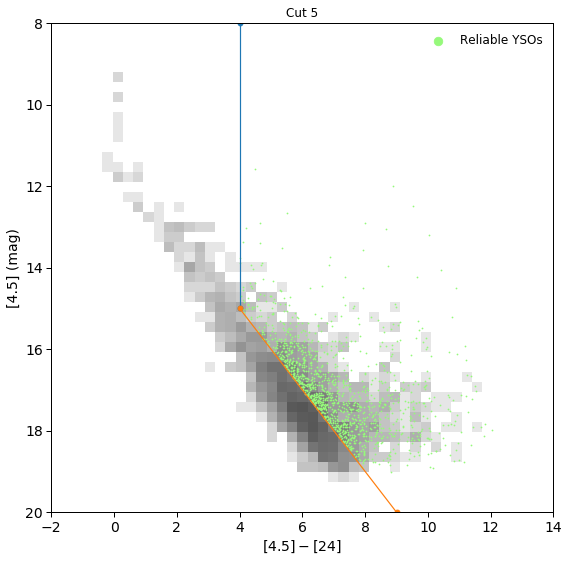

In [25]:
#4524 Spitzer
#Defining the magnitude and color
color = data['k45mag'][idx_4524]-data['k24mag'][idx_4524]
mag2= data['k45mag'][idx_4524]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 14, 50) #(min, max, nbins)
magedges = np.linspace(8, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(9,9))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,14],
         ylim=[20,8],
         xlabel='$[4.5] - [24]$',
         ylabel='[4.5] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k45mag'][c5_idx]-data['k24mag'][c5_idx], data['k45mag'][c5_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_cat['k45mag'][c5_rel_idx]-reliable_cat['k24mag'][c5_rel_idx], reliable_cat['k45mag'][c5_rel_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")

lines=([4,4],[8,15],[4,9],[15,20])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,marker='o')

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 5',fontsize=12)

Text(0.5,1,'Cut 6')

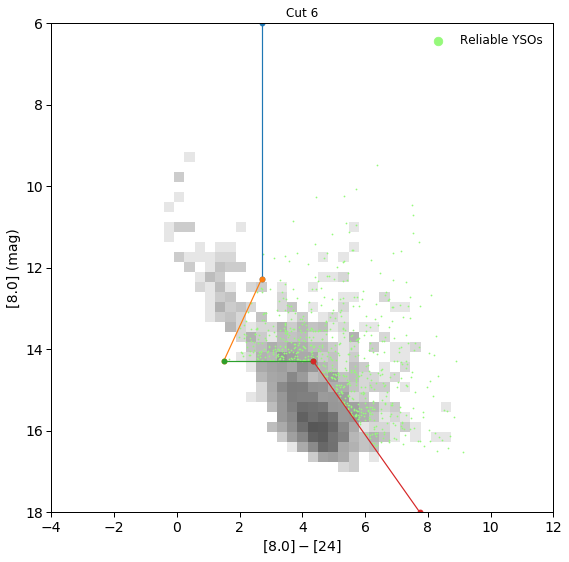

In [26]:
#8024 Spitzer
#Defining the magnitude and color
color = data['k80mag'][idx_8024]-data['k24mag'][idx_8024]
mag2= data['k80mag'][idx_8024]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-4.0, 12, 50) #(min, max, nbins)
magedges = np.linspace(6, 18, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(9,9))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-4,12],
         ylim=[18,6],
         xlabel='$[8.0] - [24]$',
         ylabel='[8.0] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k80mag'][c6_idx]-data['k24mag'][c6_idx], data['k80mag'][c6_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_cat['k80mag'][c6_rel_idx]-reliable_cat['k24mag'][c6_rel_idx], reliable_cat['k80mag'][c6_rel_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")

lines=([2.7,2.7],[6,12.281],[2.7,1.497],[12.281,10+mod],[1.497,4.34],[10+mod,10+mod],[4.34,7.74],[10+mod,18])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,marker='o')

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 6',fontsize=12)

Text(0.5,1,'Cut 7')

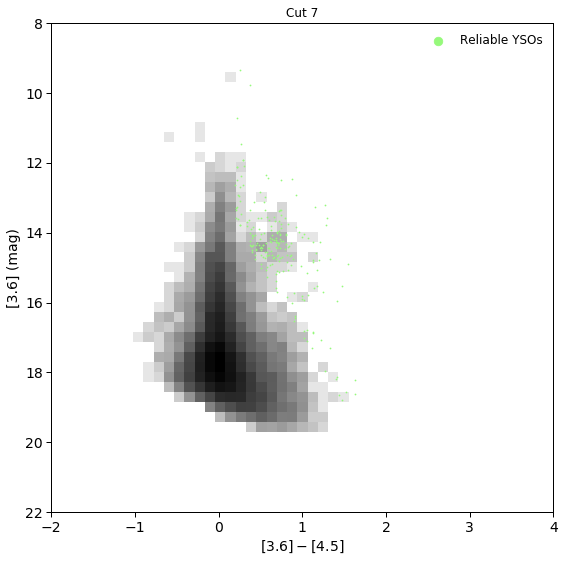

In [27]:
#3645 Spitzer
#Defining the magnitude and color
color = data['k36mag'][idx_3645]-data['k45mag'][idx_3645]
mag2= data['k36mag'][idx_3645]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 4, 50) #(min, max, nbins)
magedges = np.linspace(8, 22, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(9,9))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,4],
         ylim=[22,8],
         xlabel='$[3.6] - [4.5]$',
         ylabel='[3.6] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c7_idx]-data['k45mag'][c7_idx], data['k36mag'][c7_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_cat['k36mag'][c7_rel_idx]-reliable_cat['k45mag'][c7_rel_idx], reliable_cat['k36mag'][c7_rel_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 7',fontsize=12)

Text(0.5,1,'Cut 9')

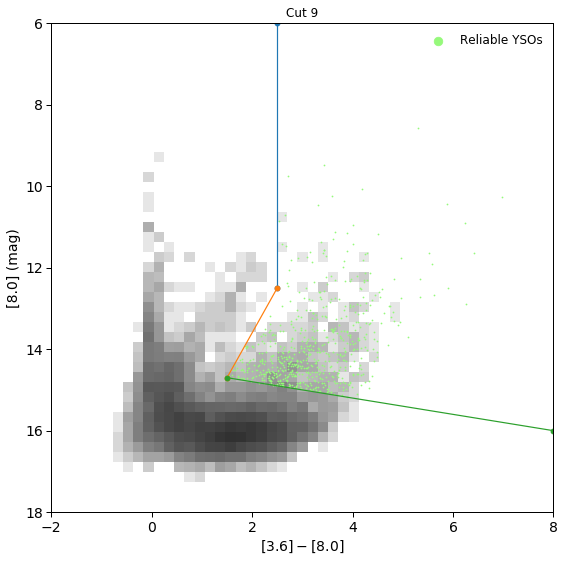

In [40]:
#3680 Spitzer
#Defining the magnitude and color
color = data['k36mag'][idx_3680]-data['k80mag'][idx_3680]
mag2= data['k80mag'][idx_3680]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(6, 18, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(9,9))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[18,6],
         xlabel='$[3.6] - [8.0]$',
         ylabel='[8.0] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_cat['k36mag'][c9_rel_idx]-reliable_cat['k80mag'][c9_rel_idx], reliable_cat['k80mag'][c9_rel_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")

lines=([2.5,2.5],[6,12.5],[2.5,1.5],[12.5,14.7],[1.5,8],[14.7,16])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,marker='o')

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 9',fontsize=12)


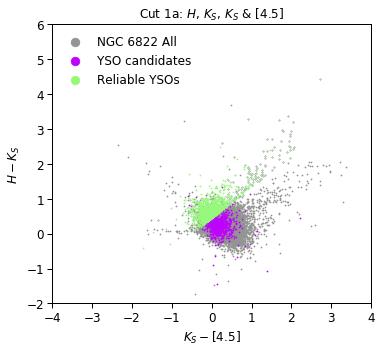

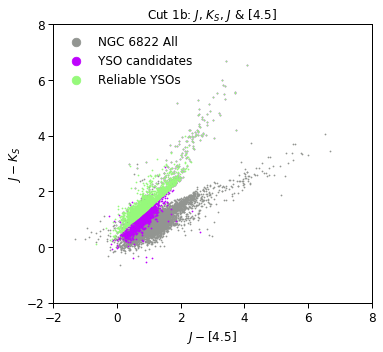

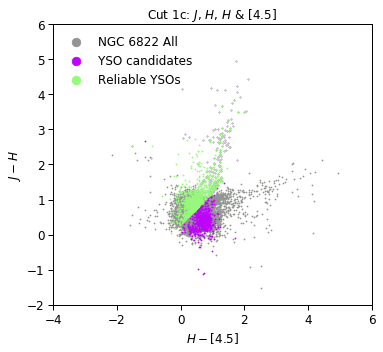

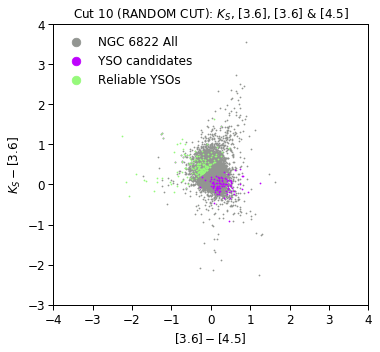

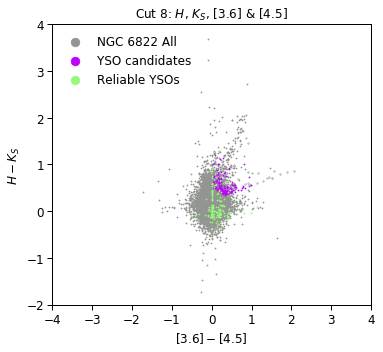

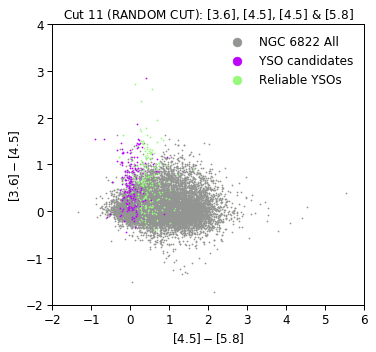

In [41]:
#CCDs
#produce CCD for [a]-[b]vs.[c]-[d] with corresponding column titles

def ccd(cut,A,B,C,D,bgd_idx,cut_idx,a,b,c,d,xlimits,ylimits,pos):
    # Setting up plotting sizes
    plt.rc('font', family='sans-serif')
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=12)
    plt.rc("ytick", labelsize=12)
    plt.rc("axes", labelsize=12)
    plt.rc("legend", fontsize=12)
    # plt.rcdefaults() # Resets the parameters to their default values

    # Setting up figure
    fig = plt.figure(figsize=(10, 5))
    ax = plt.gca()  # Sets up active plot region

    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Plot everything
    plt.scatter(data[C][bgd_idx]-data[D][bgd_idx], data[A][bgd_idx]-data[B][bgd_idx], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

    # Plot 24 flux stars
    #plt.scatter(data[A][MIPS24_idx]-data[B][MIPS24_idx], data[C][MIPS24_idx]-data[D][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] flux")
    # Plot only sensible stars which satify the cut criteria
    plt.scatter(data[A][cut_idx]-data[B][cut_idx], data[C][cut_idx]-data[D][cut_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    #Plot only reliable catalogue
    plt.scatter(reliable_cat[A][cut_idx]-reliable_cat[B][cut_idx], reliable_cat[C][cut_idx]-reliable_cat[D][cut_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")
    
    plt.xlim(xlimits[0],xlimits[1])
    plt.ylim(ylimits[0],ylimits[1])
    
    # Set the axis lables
    x_label = '$'+c+' - '+d+'$'
    y_label = '$'+a+' - '+b+'$'
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Add a legend and a title
    plt.legend(loc=pos,frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
    plt.title('Cut '+cut+': $'+a+'$, $'+b+'$, $'+c+'$ & $'+d+'$',fontsize=12)
    
    fig.tight_layout()
    #plt.savefig("bla.pdf", bbox_inches='tight')
    plt.show()
    plt.close()
    

ccd('1a','Hmag','Kmag','Kmag','k45mag',idx_HKK45,c1a_rel_idx,'H','K_S','K_S','[4.5]',[-4,4],[-2,6],'upper left')
ccd('1b','Jmag','Kmag','Jmag','k45mag',idx_JKJ45,c1b_rel_idx,'J','K_S','J','[4.5]',[-2,8],[-2,8],'upper left')
ccd('1c','Jmag','Hmag','Hmag','k45mag',idx_JHH45,c1c_rel_idx,'J','H','H','[4.5]',[-4,6],[-2,6],'upper left')
#ccd('k36mag','k45mag','k58mag','k80mag',idx_ysoish_36455880,'[3.6]','[4.5]','[5.8]','[8.0]',[-6,8],[-4,6])

#random criteria for c10 - we don't care about this really
ccd('10 (RANDOM CUT)','Kmag','k36mag','k36mag','k45mag',idx_K363645,c10_rel_idx,'K_S','[3.6]','[3.6]','[4.5]',[-4,4],[-3,4],'upper left')
ccd('8','Hmag','Kmag','k36mag','k45mag',idx_HK3645,c8_idx,'H','K_S','[3.6]','[4.5]',[-4,4],[-2,4],'upper left')
ccd('11 (RANDOM CUT)','k36mag','k45mag','k45mag','k58mag',idx_36454558,c10_rel_idx,'[3.6]','[4.5]','[4.5]','[5.8]',[-2,6],[-2,4],'upper right')


In [35]:
ascii.write(data, 'NGC6822_Full_Statistics.csv', format='csv', fast_writer=False)

In [38]:
#Test any catalogue to check for upper limits
#quick_cat=data[idx_HK3645]
#quick_cat.show_in_browser(jsviewer=True)